In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import os

<h1>Steepest descent using backtracking</h1>

In [30]:
def steepest_descent_backtracking(f, x, solution=None,step=1, alpha=0.5, beta=0.8, tol=1e-6,max_iter=100,task='1',report_file='report.txt',minimizers=False):
    iter_count = 0
    closeness = -1
    df=open(report_file,'a')
    df.write(f'############### START PROBLEM {task} ###############')
    df.write('\n')
    grad_x = nd.Gradient(f)(x)
    while np.linalg.norm(grad_x) > tol and iter_count<max_iter:
        iter_count += 1
        print(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad_x)}')
        df.write(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad_x)}')
        df.write('\n')
        x_old = x
        while f(x - step*grad_x) > f(x) - alpha*step*np.dot(grad_x, grad_x):
            step = beta*step
        x = x - step*grad_x
        grad_x = nd.Gradient(f)(x)
    if minimizers:
        # print(np.round(solution[0] - np.round(x_old[0])))
        closeness = np.linalg.norm(x_old-solution)
    df.write(f'############### END PROBLEM {task}. Solution: x = {str(x_old)} , f(x)={f(x_old)}, gradient_norm(x)={np.linalg.norm(nd.Gradient(f)(x_old))},||x-x*||={np.round(closeness)} , on iteration: {iter_count} ###############')
    df.write('\n')
    df.close()
    return 1

def newthon_method(f, x,solution=None, step=1, alpha=0.5, beta=0.8, tol=1e-6,max_iter=1000,task='1',report_file='report.txt',minimizers=False):
    iter_count = 0
    closeness = -1
    df=open(report_file,'a')
    df.write(f'############### START PROBLEM {task} ###############')
    df.write('\n')
    grad_x = nd.Gradient(f)(x)
    hessian_x = nd.Hessian(f)(x)
    while np.linalg.norm(grad_x) > tol and iter_count<max_iter:
        iter_count += 1
        print(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad_x)}')
        df.write(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad_x)}')
        df.write('\n')
        x_old = x
        if len(x)>1:
            p = -np.linalg.inv(hessian_x) @ grad_x
        else:
            p = -np.linalg.inv(hessian_x) @ np.array([grad_x])
        # print(p)
        # while f(x + step*p) > f(x) + alpha*step*np.array([grad_x])@p:
        while f(x + step*p) > f(x) + alpha*step*np.dot(grad_x, grad_x):
            step = beta*step
        x = x + step*p
        grad_x = nd.Gradient(f)(x)
        hessian_x = nd.Hessian(f)(x)
    if minimizers:
        # print(np.round(solution[0] - np.round(x_old[0])))
        closeness = np.linalg.norm(x_old-solution)
    df.write(f'############### END PROBLEM {task}. Solution: x = {str(x_old)} , f(x)={f(x_old)}, gradient_norm(x)={np.linalg.norm(nd.Gradient(f)(x_old))},||x-x*||={np.round(closeness)}, on iteration: {iter_count} ###############')
    df.close()
    return 1

<H2>Task 1. Functions. NM,SD</H2>

In [31]:
def quartic(x):
    return x**4 - 3*x**2 + 2*x + 1

def cos_fun(x):
    return np.cos(x)-2*x**3
def third_degree(x):
    return x**3 - 5*x - 9
def booth_func(x):
    return (x + 2*x**2 - 7)**2 + (2*x + x**2 - 5)**2
def sixth_degree_polynomial(x):
    return x**6 - 2*x**5 + 3*x**4 + 4*x**3 - 5*x**2 + 6*x - 7
def fourth_degree_polynomial(x):
    return 2*x**4 + 5*x**3 - 3*x**2 + 7*x - 8
def fun_2vars(x):
    return 0.5*(x[0] - 4.5)**2 + 2.5*(x[1] - 2.3)**2
x0 = np.array([0])
sixth_degree_polynomial_x0 = np.array([1])
fourth_degree_polynomial_x0 = np.array([-1])
quartic_x0 = np.array([-1])
booth_func_x0 = np.array([1])
cos_fun_x0 = np.array([1])
third_degree_x0 = np.array([1])


tasks_1_SD = [quartic,cos_fun,sixth_degree_polynomial,booth_func,third_degree]
points = [quartic_x0,cos_fun_x0,sixth_degree_polynomial_x0,booth_func_x0,third_degree_x0]
minimizers = [[-1.36602514],np.round([4.40314667e+12]),[-1.00000001], [1.57673543] ,[1.29099391]]
i = 0
for objective,point,minimizer in zip(tasks_1_SD,points,minimizers):
    i = i+1
    steepest_descent_backtracking(objective, point,minimizer,task=str(i),report_file='task_1_sd.txt',minimizers=True)


Iteration: 1 , x = [-1] , f(x)=[-3], gradient(x)=3.999999999999999
Iteration: 2 , x = [-1.34359738] , f(x)=[-3.84401481], gradient(x)=0.35944647622989295
Iteration: 3 , x = [-1.36335816] , f(x)=[-3.84801801], gradient(x)=0.043605687308932294
Iteration: 4 , x = [-1.36575541] , f(x)=[-3.84807561], gradient(x)=0.004424614078001518
Iteration: 5 , x = [-1.36599866] , f(x)=[-3.84807621], gradient(x)=0.00043843902897243745
Iteration: 6 , x = [-1.36602276] , f(x)=[-3.84807621], gradient(x)=4.333969685627048e-05
Iteration: 7 , x = [-1.36602514] , f(x)=[-3.84807621], gradient(x)=4.283094483186116e-06
Iteration: 1 , x = [1] , f(x)=[-1.45969769], gradient(x)=6.841470984807919
Iteration: 2 , x = [7.84147098] , f(x)=[-964.31068925], gradient(x)=369.9319249763467
Iteration: 3 , x = [377.77339596] , f(x)=[-1.07826151e+08], gradient(x)=856277.1370733886
Iteration: 4 , x = [856654.91046935] , f(x)=[-1.25732549e+18], gradient(x)=4403145813803.7
Iteration: 5 , x = [4.40314667e+12] , f(x)=[-1.70733779e+38]

In [30]:
#points for newthon method

tasks_1_SD = [quartic,cos_fun,sixth_degree_polynomial,booth_func,third_degree]
points = [quartic_x0,cos_fun_x0,sixth_degree_polynomial_x0,booth_func_x0,third_degree_x0] 
minimizers = [[-1.36602514],[6.80573757e-06],[-1.00000001], [1.57673543] ,[1.29099391]]
for objective,point,minmizer in zip(tasks_1_SD,points,minimizers):
    i = i+1
    newthon_method(objective, point,minmizer,task=str(objective),report_file='task_1_nm.txt',minimizers=True)

Iteration: 1 , x = [-1] , f(x)=[-3], gradient(x)=3.999999999999999
Iteration: 2 , x = [-1.66666667] , f(x)=[-2.95061728], gradient(x)=6.518518518518517
Iteration: 3 , x = [-1.42818428] , f(x)=[-3.81508131], gradient(x)=1.0832233139275995
Iteration: 4 , x = [-1.36955727] , f(x)=[-3.84797373], gradient(x)=0.05810015801160853
Iteration: 5 , x = [-1.36603781] , f(x)=[-3.84807621], gradient(x)=0.00020339583667442631
Iteration: 1 , x = [1] , f(x)=[-1.45969769], gradient(x)=6.841470984807919
Iteration: 2 , x = [0.4544413] , f(x)=[0.7108068], gradient(x)=1.6780617773284912
Iteration: 3 , x = [0.19025458] , f(x)=[0.96818291], gradient(x)=0.4062897148243056
Iteration: 4 , x = [0.06581711] , f(x)=[0.99726461], gradient(x)=0.091760952369834
Iteration: 5 , x = [0.01448634] , f(x)=[0.99988899], gradient(x)=0.01574495237146903
Iteration: 6 , x = [0.00107189] , f(x)=[0.99999942], gradient(x)=0.0010787831005801653
Iteration: 7 , x = [6.80573757e-06] , f(x)=[1.], gradient(x)=6.806015469807091e-06
Iterat

<h2>EX 2</h2>

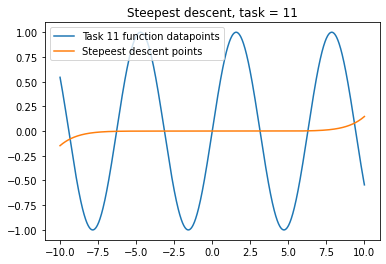

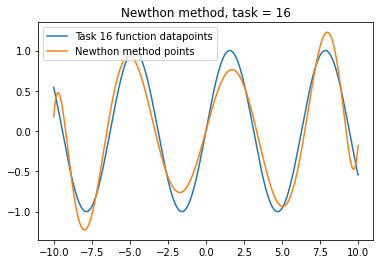

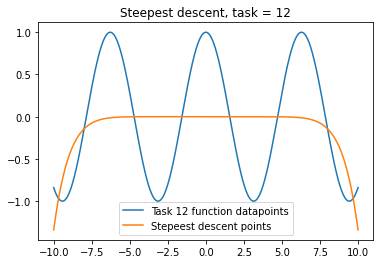

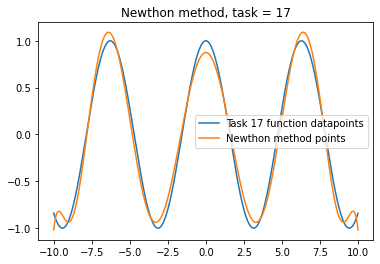

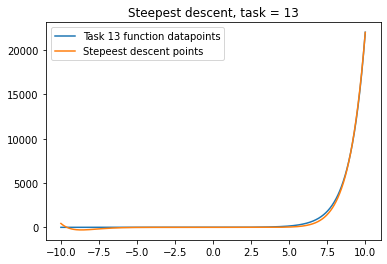

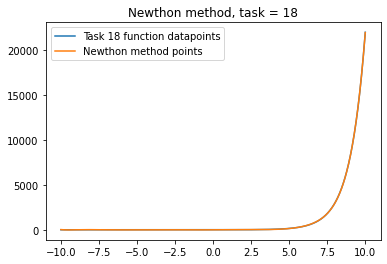

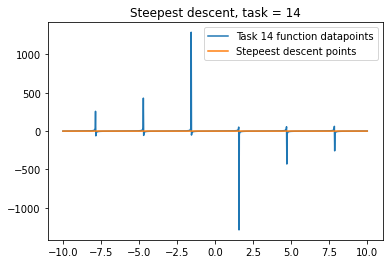

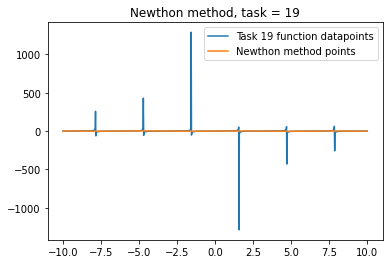

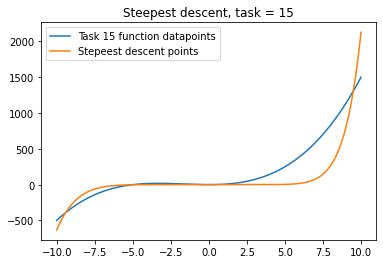

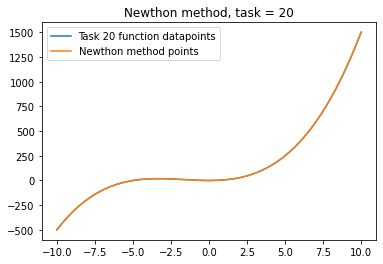

In [91]:

#DEFINE OUR FUNCTIONS
def fun_ex2_1(x):
    return np.sin(x)
def fun_ex2_2(x):
    return np.cos(x)
def fun_ex2_3(x):
    return np.exp(x)
def fun_ex2_4(x):
    return np.tan(x)
def fun_ex2_5(x):
    return x**3+5*x**2

def generate_data(func,q, m):
    a = np.linspace(-q, q, m)
    b = func(a)
    return a, b

def phi(x, t):
    return np.sum([x[i]*t**i for i in range(len(x))])

def residuals(x, a, b):
    return np.array([phi(x, a[i]) - b[i] for i in range(len(a))])

def objective(x, a, b):
    r = residuals(x, a, b)
    return 0.5*np.sum(r**2)

def gradient(x, a, b):
    r = residuals(x, a, b)
    jacobian = np.array([[a[i]**j for j in range(len(x))] for i in range(len(a))])
    return np.dot(jacobian.T, r)

def hessian(x, a):
    jacobian = np.array([[a[i]**j for j in range(len(x))] for i in range(len(a))])
    return np.dot(jacobian.T, jacobian)

def steepest_descent_backtracking_least_squares(x,a,b, step=1, alpha=0.5, beta=0.8, tol=1e-6,max_iter=1000,task='1',report_file='least_squares_sd.txt'):
    iter_count = 0
    df=open(report_file,'a')
    df.write(f'############### START PROBLEM {task} ###############')
    df.write('\n')
    grad_x = gradient(x, a, b)
    while np.linalg.norm(grad_x) > tol and iter_count<max_iter:
        iter_count += 1
        df.write(f'Iteration: {iter_count} , x = {str(x)} , f(x)={objective(x,a,b)}, gradient(x)={np.linalg.norm(grad_x)}')
        df.write('\n')
        x_old = x
        while objective(x - step*grad_x,a,b) > objective(x,a,b) - alpha*step*np.dot(grad_x, grad_x):
            step = beta*step
        x = x - step*grad_x
        grad_x = gradient(x, a, b)
    df.write(f'############### END PROBLEM {task}. Solution: x = {str(x_old)} , f(x)={objective(x_old,a,b)}, gradient_norm(x)={np.linalg.norm(gradient(x, a, b))}, on iteration: {iter_count} ###############')
    df.write('\n')
    df.close()
    return x
def newthon_method_least_squares(x,a,b, step=1, alpha=0.5, beta=0.8, tol=1e-6,max_iter=1000,task='1',report_file='least_squares_nm.txt'):
    iter_count = 0
    df=open(report_file,'a')
    df.write(f'############### START PROBLEM {task} ###############')
    df.write('\n')
    grad_x =gradient(x, a, b)
    hessian_x = hessian(x, a)
    while np.linalg.norm(grad_x) > tol and iter_count<max_iter:
        iter_count += 1
        df.write(f'Iteration: {iter_count} , x = {str(x)} , f(x)={objective(x,a,b)}, gradient(x)={np.linalg.norm(grad_x)}')
        df.write('\n')
        x_old = x
        if len(x)>1:
            p = -np.linalg.inv(hessian_x) @ grad_x
        else:
            p = -np.linalg.inv(hessian_x) @ np.array([grad_x])
        while objective(x + step*p,a,b) > objective(x,a,b) + alpha*step*np.dot(grad_x, grad_x):
            step = beta*step
        x = x + step*p
        grad_x = gradient(x, a, b)
        hessian_x = hessian(x, a)
    df.write(f'############### END PROBLEM {task}. Solution: x = {str(x_old)} , f(x)={objective(x_old,a,b)}, gradient_norm(x)={np.linalg.norm(gradient(x_old, a, b))}, on iteration: {iter_count} ###############')
    df.close()
    return x

# Generate data
def plot(func,title='Title',label_1='label',label_2='',save_title=''):
    t = np.linspace(-q, q, 1000)
    vals = func(t)
    poly_vals = [phi(x, ti) for ti in t]
    plt.plot(t, vals, label=label_1)
    plt.plot(t, poly_vals, label=label_2)
    plt.title(title)
    plt.legend()
    
    fn = os.path.join('figs', save_title)
    plt.savefig(fn)
    plt.show()
tasks_2 = [fun_ex2_1,fun_ex2_2,fun_ex2_3,fun_ex2_4,fun_ex2_5]

q = 10
m = 100
n = 10
a, b = generate_data(fun_ex2_5,q, m)
x0 = np.zeros(n+1)
i = 10
for task in tasks_2:
    i += 1
    a, b = generate_data(task,q, m)
    x = steepest_descent_backtracking_least_squares(x0, a, b)
    plot(task,title=f'Steepest descent, task = {i}',label_1=f'Task {i} function datapoints',label_2=f'Stepeest descent points',save_title=f'sd_task_{i}.png')
    x = newthon_method_least_squares(x0,a,b)
    plot(task,title=f'Newthon method, task = {i+5}',label_1=f'Task {i+5} function datapoints',label_2=f'Newthon method points',save_title=f'nm_task_{i+5}.png')



<h1>EX 3 | SD for quadratic problems</h1>

In [32]:
def hilbert_matrix(n):
    return np.array([[1/(i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])
def objective(x, Q, b):
    return 0.5 * np.dot(np.dot(x.T, Q), x) - np.dot(b, x)
def grad_objective(x, Q, b):
    return np.dot(Q, x) - b

# Set up the problem with n=5,8,12,20,30
ns = [5,8,12,20,30]
i=20
for n in ns:
    Q = hilbert_matrix(n)
    b = np.ones(n)
    x0 = np.zeros(n)
    i += 1
    eigenvalues = np.linalg.eigvals(Q)
    ratio = (eigenvalues[-1] - eigenvalues[0]) / (eigenvalues[-1] + eigenvalues[0])
    condition_num = eigenvalues[-1]/eigenvalues[0]
    # print(ratio)
    # print(condition_num)

    df=open('task_3_nm.txt','a')
    df.write('\n')
    df.write(f'Quadratic problem | Hilbert matrix | Dims:{str(n)} | Eigvalues: {str(eigenvalues)} | Ratio: {str(ratio)} | Condition number: {str(condition_num)} ')
    df.write('\n')
    df.write('\n')
    df.close()
    # alpha = 0.1
    # beta = 0.5
    # max_iter = 1000
    # tol = 1e-6
    # ro = 0.5
    steepest_descent_backtracking(lambda x: objective(x, Q, b),x0,task=str(i),max_iter=100,report_file='task_3_nm.txt')

Iteration: 1 , x = [0. 0. 0. 0. 0.] , f(x)=0.0, gradient(x)=2.2360679774997894
Iteration: 2 , x = [0.64 0.64 0.64 0.64 0.64] , f(x)=-1.8777396825396826, gradient(x)=0.87746348746355
Iteration: 3 , x = [0.34474667 0.68608    0.83236571 0.91769905 0.97458794] , f(x)=-2.340066345785271, gradient(x)=0.7696651390424198
Iteration: 4 , x = [0.09541274 0.71479729 0.99551107 1.16406472 1.27845653] , f(x)=-2.696313969775608, gradient(x)=0.6774088476361212
Iteration: 5 , x = [-0.11665503  0.72712438  1.13230901  1.38241148  1.55494286] , f(x)=-2.972787976432306, gradient(x)=0.5986983683840833
Iteration: 6 , x = [-0.29645339  0.72535544  1.24629653  1.5764374   1.80762274] , f(x)=-3.1892345462218663, gradient(x)=0.5318110312277
Iteration: 7 , x = [-0.44831925  0.7114735   1.34053541  1.74934491  2.03959337] , f(x)=-3.360482691292288, gradient(x)=0.47523761016533445
Iteration: 8 , x = [-0.57601047  0.68719621  1.41767866  1.90390937  2.25353914] , f(x)=-3.4976691530836916, gradient(x)=0.42764633814

<h2>EX 4. 4th Degree multivariate functions. NM</h2>

In [34]:

def fun_2vars_4deg_1(x):
    return 3*x[0]**4+6*x[1]**2+5
def fun_2vars_4deg_2(x):
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1]
def fun_2vars_4deg_3(x):
    return x[0]**4 + x[1]**4 - 4*x[1]*x[0] + 5*x[0] - 5*x[1]
def fun_2vars_4deg_4(x):
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 5*x[0] + 5*x[1]
def fun_2vars_4deg_5(x):
    return x[0]**4 - 2*x[0]**2 + x[1]**4 - 2*x[1]**2 + 4*x[0]*x[1] - 1
fun_2vars_4deg_1_x0 = np.array([1,0])
fun_2vars_4deg_2_x0 = np.array([-2,-1])
fun_2vars_4deg_3_x0 =  np.array([0,0])
fun_2vars_4deg_4_x0 = np.array([0,0])
fun_2vars_4deg_5_x0 = np.array([-1,1])

tasks_4_NM = [fun_2vars_4deg_1,fun_2vars_4deg_2,fun_2vars_4deg_3,fun_2vars_4deg_4,fun_2vars_4deg_5]
points_4_NM = [fun_2vars_4deg_1_x0,fun_2vars_4deg_2_x0,fun_2vars_4deg_3_x0,fun_2vars_4deg_4_x0,fun_2vars_4deg_5_x0] 
minimizers = [ [0.00513823,0], [-1.00025955,-1.00013035],[-0.77851061,0.77851061],[-1.38057119,-1.38057119], [-1.41421424,1.41421424] ]
i = 25
for objective,point,minimizer in zip(tasks_4_NM,points_4_NM,minimizers):
    i = i+1
    newthon_method(objective, point,minimizer,task=str(i),report_file='task_4_nm.txt',minimizers=True)


Iteration: 1 , x = [1 0] , f(x)=8, gradient(x)=11.999999999999996
Iteration: 2 , x = [0.66666667 0.        ] , f(x)=5.592592592592594, gradient(x)=3.555555555555564
Iteration: 3 , x = [0.44444444 0.        ] , f(x)=5.117055326931871, gradient(x)=1.0534979423868358
Iteration: 4 , x = [0.2962963 0.       ] , f(x)=5.0231220398877765, gradient(x)=0.31214753848498566
Iteration: 5 , x = [0.19753086 0.        ] , f(x)=5.004567316521042, gradient(x)=0.09248815955110726
Iteration: 6 , x = [0.13168724 0.        ] , f(x)=5.000902185979466, gradient(x)=0.027403899126253847
Iteration: 7 , x = [0.0877915 0.       ] , f(x)=5.000178209576191, gradient(x)=0.008119673815185587
Iteration: 8 , x = [0.05852766 0.        ] , f(x)=5.000035201891593, gradient(x)=0.0024058292785712797
Iteration: 9 , x = [0.03901844 0.        ] , f(x)=5.000006953460068, gradient(x)=0.0007128383047630842
Iteration: 10 , x = [0.02601229 0.        ] , f(x)=5.000001373522976, gradient(x)=0.00021121134956248426
Iteration: 11 , x = [

<h1>Project Part 2</h1>

In [24]:
def rosenbrock(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[1])**2

# Gradient of Rosenbrock function
def rosenbrock_grad(x):
    return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]), 200 * (x[1] - x[0]**2)])

# Hessian of Rosenbrock function
def rosenbrock_hess(x):
    return np.array([[1200*x[0]**2 - 400*x[1] + 2, -400*x[0]], [-400*x[0], 200]])

rosenbrock_points = [
    [1.2,1.2],
    [-1.2,1],
    [0.2,0.8]
]

def fun_part_2(x):
    return 150*(x[0]*x[1])**2+(0.5*x[0]+2*x[1]-2)**2

def grad_fun_part_2(x):
    df_dx = 300*x[0]*x[1]**2 + x[0] - 2
    df_dy = 300*x[1]*x[0]**2 + 4*x[1] - 4
    return np.array([df_dx, df_dy])

def hessian_fun_part_2(x):
    d2f_dx2 = 300*x[1]**2 + 1
    d2f_dxdy = 600*x[0]*x[1]
    d2f_dydx = 600*x[0]*x[1]
    d2f_dy2 = 300*x[0]**2 + 4
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dydx, d2f_dy2]])

part2_points = [
    [-0.2,1.2],
    [3.8,0.1],
    [1.9,0.6]
]

<h2>Newthon method with hessian modification</h2>

In [25]:

def backtracking_line_search(f,x, p, grad, c1=0.1, rho=0.5):
    step = 1
    while f(x + step*p) > f(x) + c1*step*np.dot(grad, p):
        step *= rho
    return step

def newton_method_modified(f,gradient,hessian,x0,report_file='proj2_nm_modified.txt',task='1',max_iter=100,beta=1e-6):
    iter_count = 0
    x = x0
    grad = gradient(x)
    df=open(report_file,'a')
    df.write(f'############### START PROBLEM {task} ###############')
    df.write('\n')
    while np.linalg.norm(gradient(x)) > 1e-4 and iter_count<max_iter:
        iter_count += 1
        print(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad)}')
        df.write(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad)}')
        df.write('\n')
        hess = hessian(x)
        grad = gradient(x)
        hess_eigvals = np.linalg.eigvals(hess)
        if np.any(hess_eigvals <= 0):
            hess += (np.abs(np.min(hess_eigvals)) + beta) * np.eye(2)
        p = np.linalg.solve(hess, -grad)
        step = backtracking_line_search(f,x,p, gradient(x))
        x = x + step*p
    print(f'Minimum point: {x} , f(x):{f(x)}')
    df.write(f'############### END PROBLEM {task}. Solution: x = {str(x)} , f(x)={f(x)}, gradient_norm(x)={np.linalg.norm(nd.Gradient(f)(x))},on iteration: {iter_count} ###############')
    df.write('\n')
    df.close()
    return x


In [26]:
for x0 in rosenbrock_points:
    print(newton_method_modified(rosenbrock,rosenbrock_grad,rosenbrock_hess,x0))

Iteration: 1 , x = [1.2, 1.2] , f(x)=5.8, gradient(x)=125.16932531574977
Iteration: 2 , x = [1.19591837 1.43020408] , f(x)=0.18507557960803836, gradient(x)=125.16932531574977
Iteration: 3 , x = [1.00065062 0.96317217] , f(x)=0.14674210947092053, gradient(x)=0.3998200870053441
Iteration: 4 , x = [1.00057519 1.00115071] , f(x)=1.3241448643680776e-06, gradient(x)=17.062067620906554
Iteration: 5 , x = [1.         0.99999967] , f(x)=1.1054663007392214e-11, gradient(x)=0.0011526673084496885
Minimum point: [1. 1.] , f(x):7.499108980257243e-27
[1. 1.]
Iteration: 1 , x = [-1.2, 1] , f(x)=19.359999999999996, gradient(x)=232.86768775422664
Iteration: 2 , x = [-1.1752809   1.38067416] , f(x)=0.1449501502887024, gradient(x)=232.86768775422664
Iteration: 3 , x = [-1.05413116  1.09594241] , f(x)=0.032461508856654275, gradient(x)=4.639426214066757
Iteration: 4 , x = [-1.04620631  1.07947303] , f(x)=0.02904038877668657, gradient(x)=10.97099489776634
Iteration: 5 , x = [-1.04620631  1.07947303] , f(x)=0

In [23]:
for x0 in part2_points:
    print(newton_method_modified(fun_part_2,grad_fun_part_2,hessian_fun_part_2,x0,report_file='proj2_nm_fun2.txt',max_iter=500))
    

Iteration: 1 , x = [-0.2, 1.2] , f(x)=8.73, gradient(x)=89.8943824718764
Iteration: 2 , x = [0.01038129 1.87481763] , f(x)=3.1362353542625048, gradient(x)=89.8943824718764
Iteration: 3 , x = [0.01170494 0.98814862] , f(x)=0.020385248123851937, gradient(x)=9.638746760671555
Iteration: 4 , x = [0.00655586 0.99867153] , f(x)=0.006430171876197543, gradient(x)=1.4404641277489372
Iteration: 5 , x = [0.00655586 0.99867153] , f(x)=0.006430171876197543, gradient(x)=0.03279092330551257
Iteration: 6 , x = [0.00655586 0.99867153] , f(x)=0.006430171876197543, gradient(x)=0.03279092330551257
Iteration: 7 , x = [0.00655586 0.99867153] , f(x)=0.006430171876197543, gradient(x)=0.03279092330551257
Iteration: 8 , x = [0.00655586 0.99867153] , f(x)=0.006430171876197543, gradient(x)=0.03279092330551257
Iteration: 9 , x = [0.00655586 0.99867153] , f(x)=0.006430171876197543, gradient(x)=0.03279092330551257
Iteration: 10 , x = [0.00655586 0.99867153] , f(x)=0.006430171876197543, gradient(x)=0.0327909233055125

<h2>Linear CG</h2>

In [35]:
def hilbert_matrix(n):
    return np.array([[1/(i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])
def objective(x, Q, b):
    return 0.5 * np.dot(np.dot(x.T, Q), x) - np.dot(b, x)
def grad_objective(x, Q, b):
    return np.dot(Q, x) - b

def exact_line_search(x, d, Q, b):
    return -np.dot(d, grad_objective(x, Q, b)) / np.dot(np.dot(d, Q), d)

def conjugate_gradient_linear(f,Q, b, x0):
    x = x0
    r = b - np.dot(Q, x)
    d = r
    while np.linalg.norm(r) > 1e-6:
        alpha = exact_line_search(x, d, Q, b)
        x = x + alpha * d
        r_new = b - np.dot(Q, x)
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        d = r_new + beta * d
        r = r_new
    print(f(x))
    return x
# Set up the problem with n=5,8,12,20,30
ns = [5]
# ns = [5,8,12,20]
i=20
for n in ns:
    Q = hilbert_matrix(n)
    b = np.ones(n)
    x0 = np.zeros(n)

    #run CG solver function

    x_min = conjugate_gradient_linear(lambda x: objective(x, Q, b),Q, b, x0)
    print(f"For n={n}, the minimum point is {x_min}")
    
    steepest_descent_backtracking(lambda x: objective(x, Q, b),x0,task=str(i),max_iter=5500,report_file='test.txt')
    # i += 1
    # eigenvalues = np.linalg.eigvals(Q)
    # ratio = (eigenvalues[-1] - eigenvalues[0]) / (eigenvalues[-1] + eigenvalues[0])
    # condition_num = eigenvalues[-1]/eigenvalues[0]

    # df=open('task_3_nm.txt','a')
    # df.write('\n')
    # df.write(f'Quadratic problem | Hilbert matrix | Dims:{str(n)} | Eigvalues: {str(eigenvalues)} | Ratio: {str(ratio)} | Condition number: {str(condition_num)} ')
    # df.write('\n')
    # df.write('\n')
    # df.close()

-12.49999999998846
For n=5, the minimum point is [    4.99999974  -119.99999988   630.00000018 -1119.9999998
   630.00000019]
Iteration: 1 , x = [0. 0. 0. 0. 0.] , f(x)=0.0, gradient(x)=2.2360679774997894
Iteration: 2 , x = [0.64 0.64 0.64 0.64 0.64] , f(x)=-1.8777396825396826, gradient(x)=0.87746348746355
Iteration: 3 , x = [0.34474667 0.68608    0.83236571 0.91769905 0.97458794] , f(x)=-2.340066345785271, gradient(x)=0.7696651390424198
Iteration: 4 , x = [0.09541274 0.71479729 0.99551107 1.16406472 1.27845653] , f(x)=-2.696313969775608, gradient(x)=0.6774088476361212
Iteration: 5 , x = [-0.11665503  0.72712438  1.13230901  1.38241148  1.55494286] , f(x)=-2.972787976432306, gradient(x)=0.5986983683840833
Iteration: 6 , x = [-0.29645339  0.72535544  1.24629653  1.5764374   1.80762274] , f(x)=-3.1892345462218663, gradient(x)=0.5318110312277
Iteration: 7 , x = [-0.44831925  0.7114735   1.34053541  1.74934491  2.03959337] , f(x)=-3.360482691292288, gradient(x)=0.47523761016533445
Iteratio

<h3>Linear CG has significant difference in convergence speed, compared to standart SD.</h3>

<h3>EX 3 | Linear CG</h3>

In [47]:

def fletcher_reeves(f,grad,x0,max_iter=300):
    iter_count = 0
    x = x0
    p = -grad(x)
    while np.linalg.norm(grad(x)) > 1e-6 and iter_count < max_iter:
        grad_x = grad(x)
        iter_count += 1
        alpha = backtracking_line_search(f,x, p, grad_x)
        print(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad_x)}')
        x_new = x + alpha*p
        beta = np.dot(grad(x_new), grad(x_new)) / np.dot(grad_x, grad_x)
        p = -grad(x_new) + beta*p
        x = x_new
    print(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad(x))}')
    return x

def polak_ribiere(f,grad,x0,max_iter=300):
    iter_count = 0
    x = x0
    p = -grad(x)
    while np.linalg.norm(grad(x)) > 1e-6 and iter_count < max_iter:
        iter_count += 1
        grad_x = grad(x)
        print(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad_x)}')
        alpha = backtracking_line_search(f,x, p, grad_x)
        x_new = x + alpha*p
        beta = np.dot(grad(x_new), grad(x_new) - grad_x) / np.dot(grad_x, grad_x)
        p = -grad(x_new) + beta*p
        x = x_new
    print(f'Iteration: {iter_count} , x = {str(x)} , f(x)={f(x)}, gradient(x)={np.linalg.norm(grad(x))}')
    return x

# x0 = np.array([0.2, 0.8])
# x0 = np.array([1.2,1.2])
# x_min_fr = fletcher_reeves(rosenbrock,rosenbrock_grad,x0)
# x_min_pr = polak_ribiere(rosenbrock,rosenbrock_grad,x0)
# print("The minimum point by Fletcher-Reeves method is ", x_min_fr)
# print("The minimum point by Polak-Ribiere method is ", x_min_pr)

for x0 in rosenbrock_points:
    polak_ribiere(rosenbrock,rosenbrock_grad,x0)

Iteration: 1 , x = [1.2, 1.2] , f(x)=5.8, gradient(x)=125.16932531574977
Iteration: 2 , x = [1.08710938 1.246875  ] , f(x)=0.48433441907400215, gradient(x)=30.985565191163456
Iteration: 3 , x = [1.08710938 1.246875  ] , f(x)=0.48433441907400215, gradient(x)=30.985565191163456
Iteration: 4 , x = [1.11457059 1.23416637] , f(x)=0.061396886984057326, gradient(x)=4.168658655035257
Iteration: 5 , x = [1.11457059 1.23416637] , f(x)=0.061396886984057326, gradient(x)=4.168658655035257
Iteration: 6 , x = [1.11081971 1.23574864] , f(x)=0.055911654871605196, gradient(x)=0.6946954705540672
Iteration: 7 , x = [1.11081971 1.23574864] , f(x)=0.055911654871605196, gradient(x)=0.6946954705540672
Iteration: 8 , x = [1.11197339 1.23503449] , f(x)=0.05545155890115401, gradient(x)=0.9161682740890283
Iteration: 9 , x = [1.11197339 1.23503449] , f(x)=0.05545155890115401, gradient(x)=0.9161682740890283
Iteration: 10 , x = [1.11154906 1.23517613] , f(x)=0.055321146682021614, gradient(x)=0.3923212156240894
Itera

<h4>We observe very slow convergence for both algorithms, but they still converge,so, are able to find a minimum</h4>